In [69]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords 
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [2]:
import seaborn as sns

In [3]:
# try tfidf and hash vectorizers, tokenization, lemmatization 
# Clear readme, what are each of the notebooks and file?



# Load in mailchimp report csv as a pandas dataframe

In [4]:
df_all_reports = pd.read_csv("Lightsource_Grand_Mailchimp_Report.csv")


In [5]:
pd.set_option('display.max_columns', 30)

In [6]:
df_all_reports.sort_values("Open Rate", ascending = False) 
# Open rate is Unique Opens over Succesful Deliveries

,Title,Subject,List,Send Date,Send Weekday,Total Recipients,Successful Deliveries,Soft Bounces,Hard Bounces,Total Bounces,Times Forwarded,Forwarded Opens,Unique Opens,Open Rate,Total Opens,Unique Clicks,Click Rate,Total Clicks,Unsubscribes,Abuse Complaints,Times Liked on Facebook,Folder Id,Unique Id,Total Orders,Total Gross Sales,Total Revenue
10,Love Parade and More | Winner,Disrupt With LOVE! Parade For Love Next Sunday,Lightsource,"May 05, 2019 11:29 am",Sunday,1412,1217,102,93,195,0,0,117,9.61%,134,2,0.16%,2,8,0,0,0,c1a600e566,0,0,0
6,Free Hugs (copy 02),This Saturday Annual Pillow Fight at Washingto...,Lightsource,"Apr 04, 2019 12:15 am",Thursday,1592,1582,4,6,10,0,0,146,9.23%,183,4,0.25%,4,10,0,0,0,6db38d21e8,0,0,0
3,Free Hugs,10 year anniversary of FREE HUGS NYC - Come ou...,Lightsource,"Mar 11, 2019 07:30 am",Monday,1890,1700,46,144,190,0,0,156,9.18%,200,2,0.12%,2,20,0,0,0,325eb1f748,0,0,0
0,Lightsource Envisioning 2019: Meetup & Tea Par...,Lightsource Envisioning 2019: Meetup & Tea Par...,Lightsource,"Dec 12, 2018 07:45 am",Wednesday,937,783,28,126,154,0,0,71,9.07%,92,1,0.13%,1,14,0,0,0,dfbbba4bf8,0,0,0
9,Love Parade and More,NaN,Lightsource,"May 05, 2019 07:30 am",Sunday,1809,1570,121,118,239,0,0,141,8.98%,167,4,0.25%,0,10,0,0,0,a94ce6d5bc,0,0,0
14,Love Parade Last Shoutout | Winner,PARADE FOR LOVE THIS SATURDAY - #FreeHugsNYC A...,Lightsource,"May 09, 2019 05:29 pm",Thursday,1010,942,68,0,68,0,0,84,8.92%,103,4,0.42%,5,2,0,0,0,b4c825516b,0,0,0
13,Love Parade Last Shoutout,NaN,Lightsource,"May 09, 2019 08:30 am",Thursday,1682,1562,120,0,120,0,0,124,7.94%,148,5,0.32%,0,7,0,0,0,cbeb25b286,0,0,0
5,Free Hugs (copy 01),10 year anniversary of FREE HUGS NYC - Come ou...,Lightsource,"Mar 22, 2019 08:15 am",Friday,1648,1594,9,45,54,0,0,126,7.90%,164,3,0.19%,3,10,0,0,0,bdfcb490de,0,0,0
12,Love Parade Last Shoutout | Combo 1,PARADE FOR LOVE THIS SATURDAY - #FreeHugsNYC A...,Lightsource,"May 09, 2019 08:29 am",Thursday,336,309,27,0,27,0,0,22,7.12%,25,1,0.32%,2,4,0,0,0,f8f95de4ae,0,0,0
8,Love Parade and More | Combo 2,Disrupt with JOY! Parade For Love Next Sunday,Lightsource,"May 05, 2019 07:29 am",Sunday,198,170,14,14,28,0,0,12,7.06%,13,1,0.59%,1,2,0,0,0,47d54435c8,0,0,0


In [7]:
df_cols_of_interest = df_all_reports.iloc[:, 0:21]

In [8]:
main_metricsa = df_cols_of_interest.iloc[:, 5:9]

In [9]:
main_metricsb = df_cols_of_interest.iloc[:, 12:18]

In [10]:
main_metrics = pd.concat([main_metricsa, main_metricsb], axis=1)

In [11]:
main_metrics

,Total Recipients,Successful Deliveries,Soft Bounces,Hard Bounces,Unique Opens,Open Rate,Total Opens,Unique Clicks,Click Rate,Total Clicks
0,937,783,28,126,71,9.07%,92,1,0.13%,1
1,1839,1784,39,16,233,13.06%,278,4,0.22%,5
2,1760,1723,31,6,219,12.71%,285,5,0.29%,6
3,1890,1700,46,144,156,9.18%,200,2,0.12%,2
4,1726,1652,33,41,264,15.98%,323,9,0.54%,11
5,1648,1594,9,45,126,7.90%,164,3,0.19%,3
6,1592,1582,4,6,146,9.23%,183,4,0.25%,4
7,199,183,5,11,12,6.56%,20,1,0.55%,1
8,198,170,14,14,12,7.06%,13,1,0.59%,1
9,1809,1570,121,118,141,8.98%,167,4,0.25%,0


In [12]:
df_all_reports.dtypes

Title                      object
Subject                    object
List                       object
Send Date                  object
Send Weekday               object
Total Recipients            int64
Successful Deliveries       int64
Soft Bounces                int64
Hard Bounces                int64
Total Bounces               int64
Times Forwarded             int64
Forwarded Opens             int64
Unique Opens                int64
Open Rate                  object
Total Opens                 int64
Unique Clicks               int64
Click Rate                 object
Total Clicks                int64
Unsubscribes                int64
Abuse Complaints            int64
Times Liked on Facebook     int64
Folder Id                   int64
Unique Id                  object
Total Orders                int64
Total Gross Sales           int64
Total Revenue               int64
dtype: object

In [13]:
#Converting to string for vectorization
df_all_reports["Subject"] = df_all_reports["Subject"].astype(str)

In [14]:
df_all_reports.Subject = df_all_reports.Subject.astype(str)

In [15]:
#df_all_reports["Subject"] = df_all_reports["Subject"].tostring()

In [16]:
df_subject_str = df_all_reports["Subject"].astype(str)

In [17]:
df_all_reports.Subject.dtypes

dtype('O')

In [18]:
df_subject_str.dtypes

dtype('O')

In [19]:
df_all_reports.shape

(15, 26)

In [20]:
Subject_string = ''
for d in df_all_reports["Subject"]:
    Subject_string+=d
    
                    

In [21]:
Subject_string

"Lightsource Envisioning 2019: Meetup & Tea Party! PLUS NEW Thou Art God wristbands & Consent Culture buttonsRegister as a member before New Years to get your Gift set!FRIDAY NIGHT - Escape The Planet // OFF TO SPACE10 year anniversary of FREE HUGS NYC - Come out and play!LAST CHANCE get free pack of stickers before they're gone10 year anniversary of FREE HUGS NYC - Come out and play in the rain!This Saturday Annual Pillow Fight at Washington Sq! FREE HUGS NYCDisrupt With LOVE!\xa0 Parade For Love Next SundayDisrupt with JOY!\xa0 Parade For Love Next SundaynanDisrupt With LOVE!\xa0 Parade For Love Next SundayDISRUPT WITH LOVE THIS SATURDAY! #FreeHugsNYC at the parade and Union SquarePARADE FOR LOVE THIS SATURDAY - #FreeHugsNYC All Weekend!nanPARADE FOR LOVE THIS SATURDAY - #FreeHugsNYC All Weekend!"

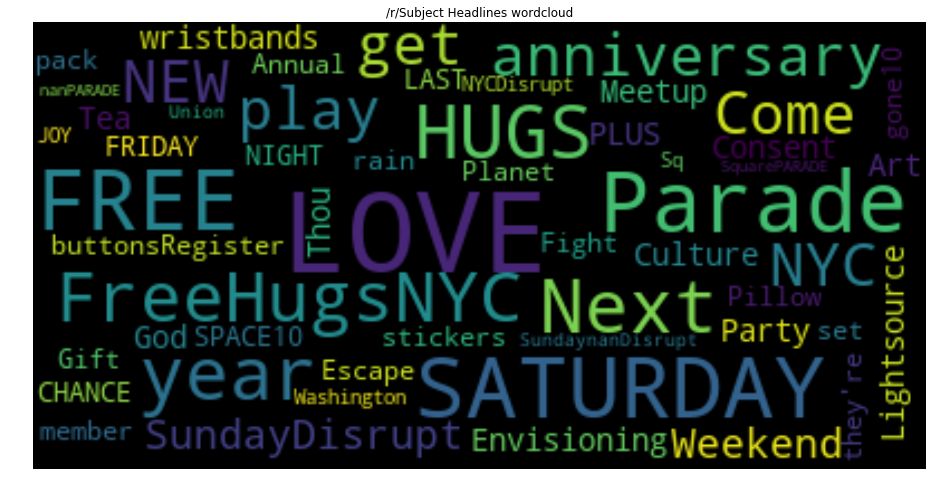

In [22]:
wordcloud = WordCloud(stopwords = stopwords.words('english'), max_font_size=50, max_words=80, background_color="black").generate(Subject_string)

plt.figure(figsize = (16, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("/r/Subject Headlines wordcloud")

plt.show()

In [23]:
mask = main_metrics.isna()

In [24]:
sns.heatmap(main_metrics, mask=mask)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

At the very least, this summed campaign data provides us a worthwile birds eye view of the data below and a Wordclous.

<Figure size 1800x1800 with 0 Axes>

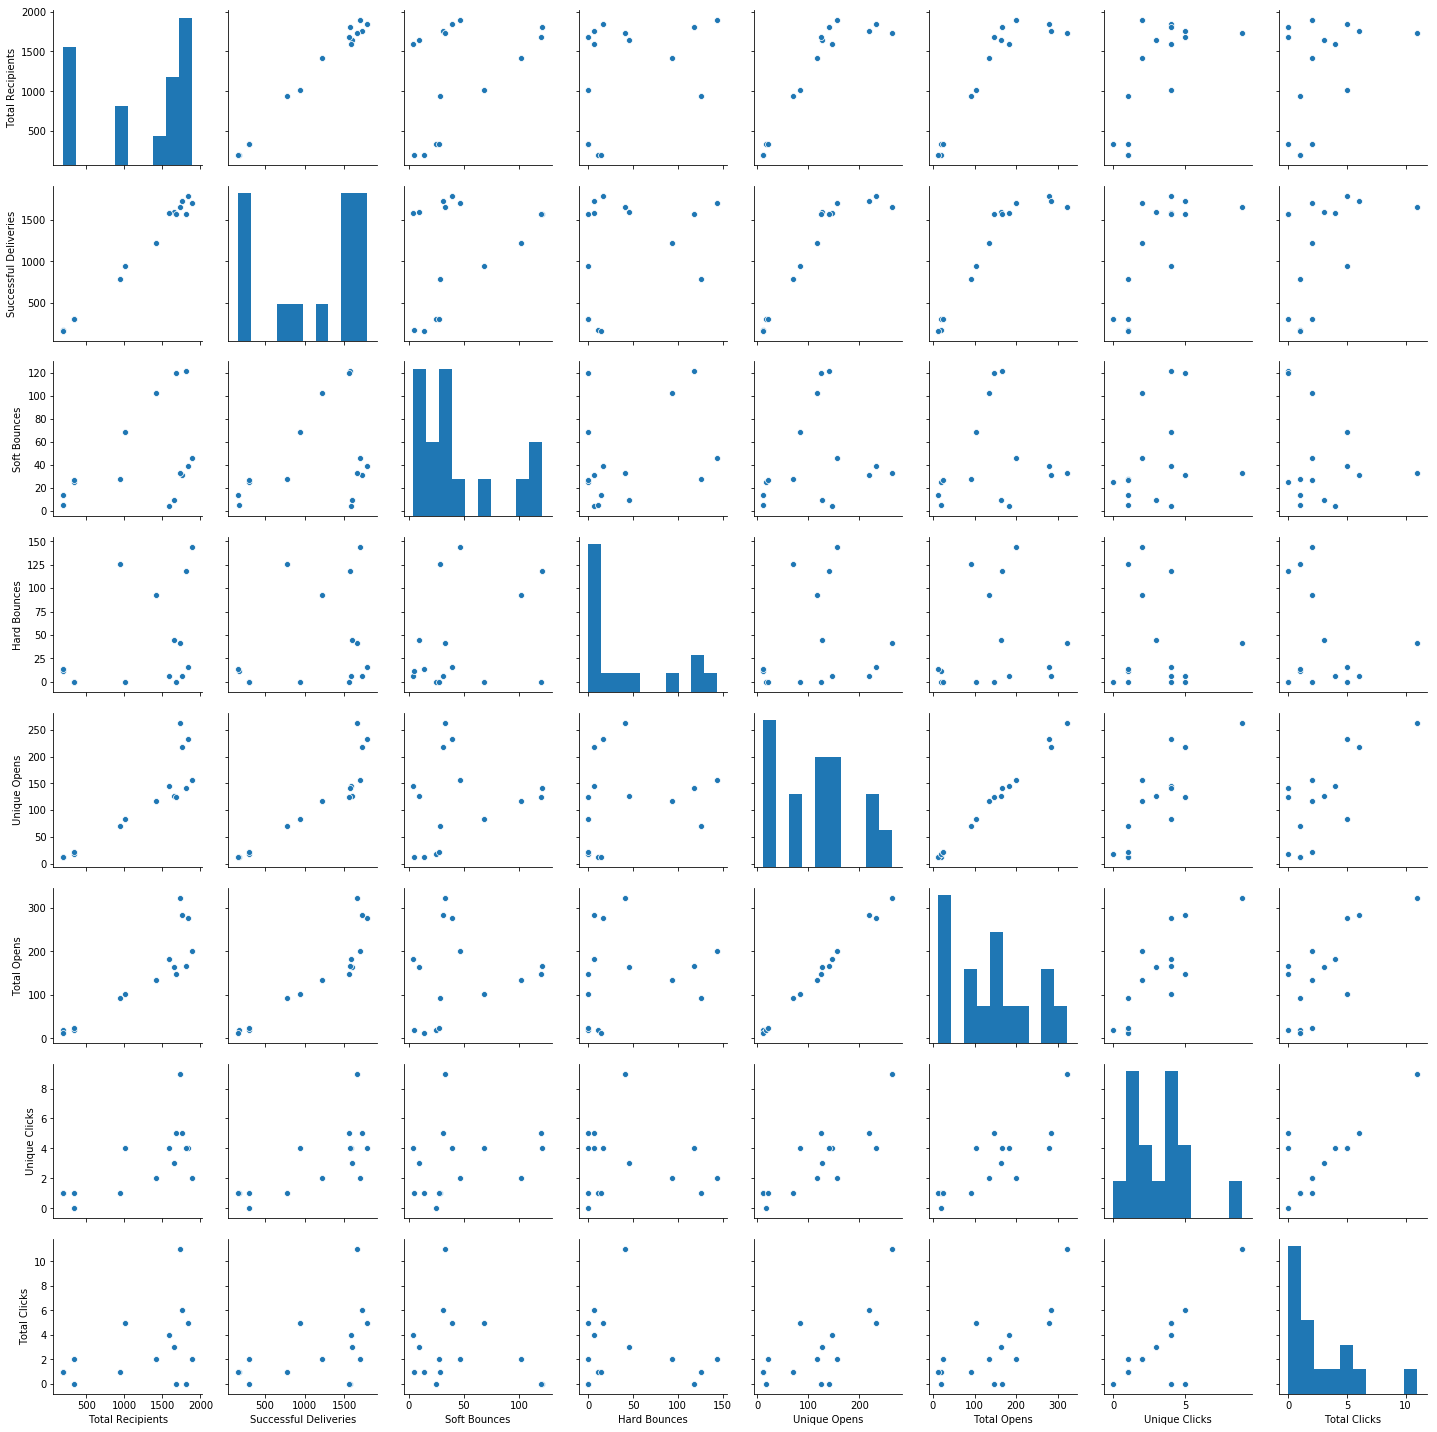

In [22]:
plt.figure(figsize=(25,25))
sns.pairplot(main_metrics)

Text(0.5, 1.0, 'Nonlinear deliveries and hard bounces relationship')

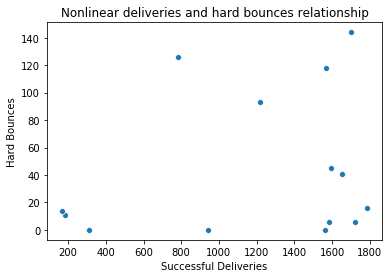

In [73]:
sns.scatterplot(main_metrics["Successful Deliveries"],
            main_metrics["Hard Bounces"]).set_title("Nonlinear deliveries and hard bounces relationship")

In [25]:
cv = CountVectorizer(max_features = 1900, stop_words = stopwords.words('english'))

In [25]:
X = df_all_reports['Subject']

In [26]:
X

0     Lightsource Envisioning 2019: Meetup & Tea Par...
1     Register as a member before New Years to get y...
2      FRIDAY NIGHT - Escape The Planet // OFF TO SPACE
3     10 year anniversary of FREE HUGS NYC - Come ou...
4     LAST CHANCE get free pack of stickers before t...
5     10 year anniversary of FREE HUGS NYC - Come ou...
6     This Saturday Annual Pillow Fight at Washingto...
7       Disrupt With LOVE!  Parade For Love Next Sunday
8        Disrupt with JOY!  Parade For Love Next Sunday
9                                                   nan
10      Disrupt With LOVE!  Parade For Love Next Sunday
11    DISRUPT WITH LOVE THIS SATURDAY! #FreeHugsNYC ...
12    PARADE FOR LOVE THIS SATURDAY - #FreeHugsNYC A...
13                                                  nan
14    PARADE FOR LOVE THIS SATURDAY - #FreeHugsNYC A...
Name: Subject, dtype: object

In [27]:
y = df_all_reports['Total Opens']

In [28]:
y

0      92
1     278
2     285
3     200
4     323
5     164
6     183
7      20
8      13
9     167
10    134
11     20
12     25
13    148
14    103
Name: Total Opens, dtype: int64

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .4)

In [50]:
cv = CountVectorizer(stop_words = stopwords.words('english'))

In [41]:
X_traincv = cv.fit_transform(X_train)
X_testcv = cv.transform(X_test)

In [42]:
lr = LinearRegression()

In [43]:
model = lr.fit(X_traincv, y_train)

In [44]:
predictions = model.predict(X_testcv)

In [45]:
model.score(X_traincv, y_train)

0.9711732238860659

In [46]:
model.score(X_testcv, y_test)

0.143355233097764

In [61]:
bag_of_words = cv.fit(X)

In [62]:
bag_of_words = cv.transform(X)

In [65]:
bag_of_words.sum()

97

In [70]:
print(bag_of_words)

  (0, 1)	1
  (0, 4)	1
  (0, 5)	1
  (0, 8)	1
  (0, 9)	1
  (0, 11)	1
  (0, 19)	1
  (0, 24)	1
  (0, 26)	1
  (0, 29)	1
  (0, 35)	1
  (0, 39)	1
  (0, 49)	1
  (0, 50)	1
  (0, 54)	1
  (1, 17)	1
  (1, 18)	1
  (1, 27)	1
  (1, 29)	1
  (1, 41)	1
  (1, 43)	1
  (1, 56)	1
  (2, 12)	1
  (2, 16)	1
  (2, 31)	1
  :	:
  (8, 48)	1
  (9, 28)	1
  (10, 10)	1
  (10, 25)	2
  (10, 30)	1
  (10, 34)	1
  (10, 48)	1
  (11, 10)	1
  (11, 15)	1
  (11, 25)	1
  (11, 34)	1
  (11, 42)	1
  (11, 46)	1
  (11, 51)	1
  (12, 15)	1
  (12, 25)	1
  (12, 34)	1
  (12, 42)	1
  (12, 53)	1
  (13, 28)	1
  (14, 15)	1
  (14, 25)	1
  (14, 34)	1
  (14, 42)	1
  (14, 53)	1
